<a href="https://colab.research.google.com/github/Shailja-Joshi/Orange-Fruit-Recognition-Using-Image-Segmentation/blob/main/Orange_fruit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import sys,os
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    print("----Libraries Loaded----")
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/My Drive/orange/Orange-Fruit-Recognition-Using-Image-Segmentation")

In [4]:
os.listdir()

['kiwi.jpg',
 'Orange.jpg',
 'requirements.txt',
 'Orange_Fruit_Part1.ipynb',
 'orange3.jpg',
 'build_model.py',
 'README.md',
 '__pycache__',
 '.git',
 'Dataset',
 'Images',
 'Images (1)',
 'model2.json',
 'Orange_Fruit_Weights2.h5']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1.0 / 255, 
        rotation_range=30,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/orange/Orange-Fruit-Recognition-Using-Image-Segmentation/Dataset/train',
    target_size=(64,64),
    batch_size=10,
    class_mode='binary')

val_set = val_datagen.flow_from_directory(
    '/content/drive/My Drive/orange/Orange-Fruit-Recognition-Using-Image-Segmentation/Dataset/validation',
    target_size=(64,64),
    batch_size=10,
    class_mode='binary')

Found 1088 images belonging to 2 classes.
Found 546 images belonging to 2 classes.


In [6]:
from build_model import classifier_model

model = classifier_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        3

In [7]:
with tf.device('/GPU:0'):
    history = model.fit(
        training_set,
        steps_per_epoch=1062//20,
        epochs=200, 
        verbose=1,
        validation_data = val_set,
        validation_steps=526//20
        #callbacks=[callback]
    )

Epoch 1/200
53/53 [==============================] - 273s 5s/step - loss: 0.5154 - accuracy: 0.7506 - val_loss: 0.6840 - val_accuracy: 0.4808
Epoch 2/200
53/53 [==============================] - ETA: 0s - loss: 0.3237 - accuracy: 0.8595

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


53/53 [==============================] - 160s 3s/step - loss: 0.3232 - accuracy: 0.8599 - val_loss: 0.7005 - val_accuracy: 0.4885
Epoch 3/200
53/53 [==============================] - 74s 1s/step - loss: 0.2132 - accuracy: 0.9156 - val_loss: 0.6941 - val_accuracy: 0.4538
Epoch 4/200
53/53 [==============================] - 43s 822ms/step - loss: 0.2373 - accuracy: 0.9122 - val_loss: 1.9948 - val_accuracy: 0.4846
Epoch 5/200
53/53 [==============================] - 28s 526ms/step - loss: 0.2129 - accuracy: 0.9224 - val_loss: 2.4896 - val_accuracy: 0.4846
Epoch 6/200
53/53 [==============================] - 20s 369ms/step - loss: 0.2277 - accuracy: 0.9103 - val_loss: 1.5883 - val_accuracy: 0.5308
Epoch 7/200
53/53 [==============================] - 18s 328ms/step - loss: 0.1991 - accuracy: 0.9397 - val_loss: 0.5533 - val_accuracy: 0.5077
Epoch 8/200
53/53 [==============================] - 17s 315ms/step - loss: 0.2465 - accuracy: 0.9013 - val_loss: 0.1536 - val_accuracy: 0.9808
Epoch 9/2

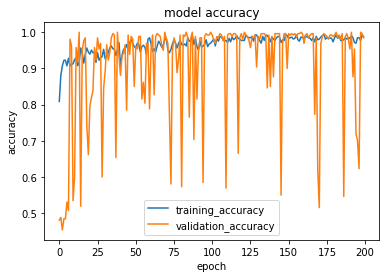

In [8]:
plt.plot(history.history['accuracy'][0:220])
plt.plot(history.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

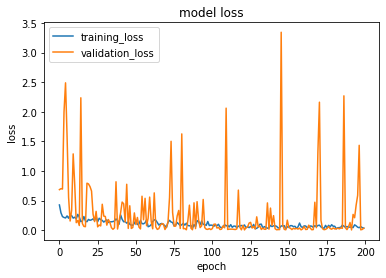

In [9]:
plt.plot(history.history['loss'][0:220])
plt.plot(history.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [10]:
m_json = model.to_json()  
with open("model2.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("Orange_Fruit_Weights2.h5")

In [11]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = model_from_json(open("model2.json", "r").read())  
model.load_weights('Orange_Fruit_Weights2.h5')

In [22]:
def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

path1 = 'banana.jpg'
img_original1 = load_img(path1)
path2 = 'Orange.jpg'
img_original2 = load_img(path2)
path3 = 'APPLE.png'
img_original3 = load_img(path3)

In [23]:
pred1 = model.predict(process_image(path1))
print("Pred1 = ",pred1)

pred2 = model.predict(process_image(path2))
print("Pred2 = ",pred2)

pred3 = model.predict(process_image(path3))
print("Pred3 = ",pred3)

Pred1 =  [[0.00084475]]
Pred2 =  [[0.99534154]]
Pred3 =  [[0.00904018]]


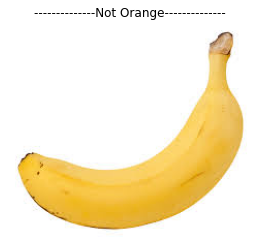

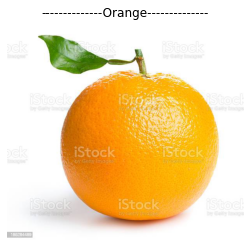

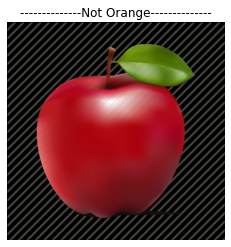

In [24]:
def show(pred,img):

  if pred>0.5: str = '--------------Orange--------------'
  else: str = '--------------Not Orange--------------'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

show(pred1,img_original1)
show(pred2,img_original2)
show(pred3,img_original3)